In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
url='https://raw.githubusercontent.com/mwaskom/seaborn-data/master/planets.csv'
df=pd.read_csv(url)
df.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [5]:
df.shape

(1035, 6)

In [13]:
df.value_counts

<bound method DataFrame.value_counts of                method  number  orbital_period   mass  distance  year
0     Radial Velocity       1      269.300000   7.10     77.40  2006
1     Radial Velocity       1      874.774000   2.21     56.95  2008
2     Radial Velocity       1      763.000000   2.60     19.84  2011
3     Radial Velocity       1      326.030000  19.40    110.62  2007
4     Radial Velocity       1      516.220000  10.50    119.47  2009
...               ...     ...             ...    ...       ...   ...
1030          Transit       1        3.941507    NaN    172.00  2006
1031          Transit       1        2.615864    NaN    148.00  2007
1032          Transit       1        3.191524    NaN    174.00  2007
1033          Transit       1        4.125083    NaN    293.00  2008
1034          Transit       1        4.187757    NaN    260.00  2008

[1035 rows x 6 columns]>

In [17]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [20]:
df.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


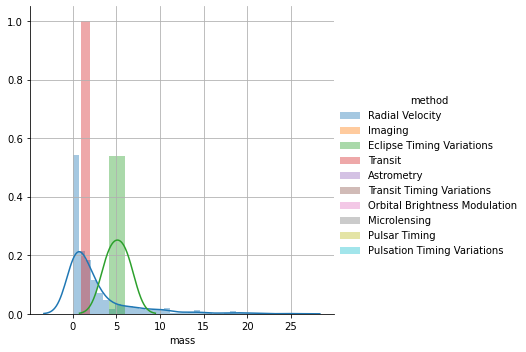

In [21]:
sns.FacetGrid(df, hue="method", size=5).map(sns.distplot, "mass").add_legend()
plt.grid()
plt.show()

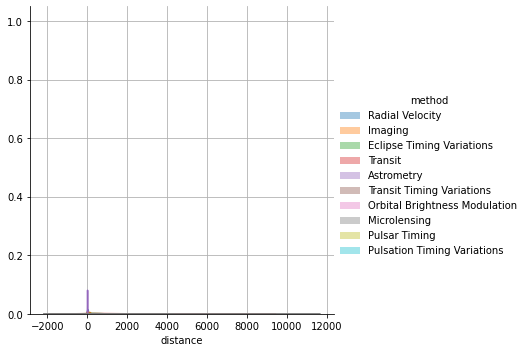

In [23]:
sns.FacetGrid(df, hue="method", size=5).map(sns.distplot,  "distance").add_legend()
plt.grid()
plt.show()

In [24]:
df.head(2)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008


In [25]:
df[df.mass==df.mass.max()]

,method,number,orbital_period,mass,distance,year
321,Radial Velocity,1,2371.0,25.0,37.05,2008


In [26]:
df.year[df.mass==df.mass.min()]

46    2012
Name: year, dtype: int64

In [27]:
df.index

RangeIndex(start=0, stop=1035, step=1)

In [28]:
g=df.groupby('method')


In [29]:
g

In [31]:
g.describe()

number            ...     year        
                               count      mean  ...      75%     max
method                                          ...                 
Astrometry                       2.0  1.000000  ...  2012.25  2013.0
Eclipse Timing Variations        9.0  1.666667  ...  2011.00  2012.0
Imaging                         38.0  1.315789  ...  2011.00  2013.0
Microlensing                    23.0  1.173913  ...  2012.00  2013.0
Orbital Brightness Modulation    3.0  1.666667  ...  2012.00  2013.0
Pulsar Timing                    5.0  2.200000  ...  2003.00  2011.0
Pulsation Timing Variations      1.0  1.000000  ...  2007.00  2007.0
Radial Velocity                553.0  1.721519  ...  2011.00  2014.0
Transit                        397.0  1.954660  ...  2013.00  2014.0
Transit Timing Variations        4.0  2.250000  ...  2013.25  2014.0

[10 rows x 40 columns]

In [32]:
g.count()

,number,orbital_period,mass,distance,year
method,,,,,
Astrometry,2,2,0,2,2
Eclipse Timing Variations,9,9,2,4,9
Imaging,38,12,0,32,38
Microlensing,23,7,0,10,23
Orbital Brightness Modulation,3,3,0,2,3
Pulsar Timing,5,5,0,1,5
Pulsation Timing Variations,1,1,0,0,1
Radial Velocity,553,553,510,530,553
Transit,397,397,1,224,397


In [33]:
g["year"].value_counts()

method                     year
Astrometry                 2010    1
                           2013    1
Eclipse Timing Variations  2011    3
                           2008    2
                           2010    2
                                  ..
Transit                    2002    1
Transit Timing Variations  2011    1
                           2012    1
                           2013    1
                           2014    1
Name: year, Length: 69, dtype: int64

In [34]:
df["year"].value_counts()

2011    185
2012    140
2013    118
2010    102
2009     98
2008     74
2007     53
2014     52
2005     39
2002     32
2006     31
2004     26
2003     25
2000     16
1999     15
2001     12
1996      6
1998      5
1992      2
1997      1
1995      1
1994      1
1989      1
Name: year, dtype: int64

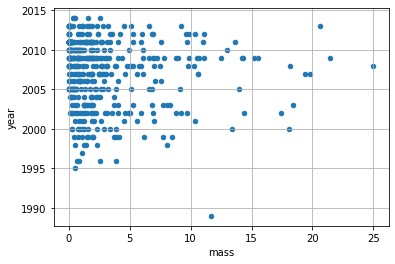

In [37]:
df.plot(kind="scatter", x="mass", y="year")
plt.grid()
plt.show()

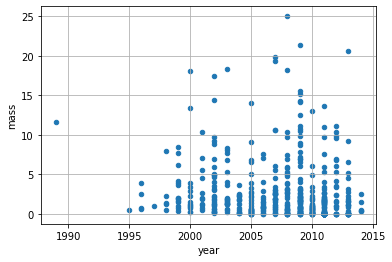

In [38]:
df.plot(kind="scatter", x="year", y="mass")
plt.grid()
plt.show()

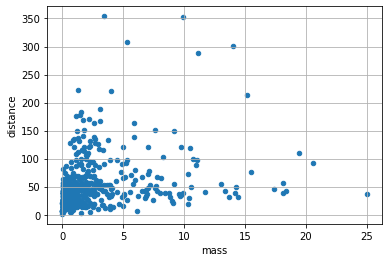

In [40]:
df.plot(kind="scatter", x="mass", y="distance")
plt.grid()
plt.show()

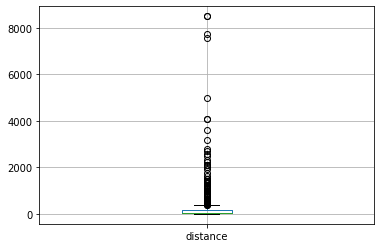

In [41]:
df.plot(kind="box", x="mass", y="distance")
plt.grid()
plt.show()

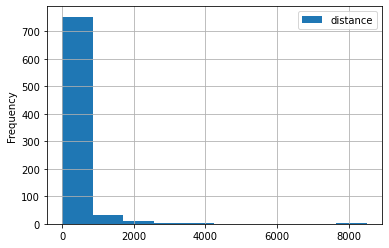

In [42]:
df.plot(kind="hist", x="mass", y="distance")
plt.grid()
plt.show()

In [43]:
df.head(5)

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


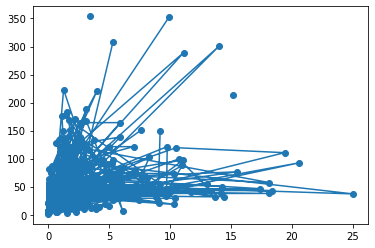

In [46]:
plt.plot(df.mass, df.distance,marker='o')
plt.show()

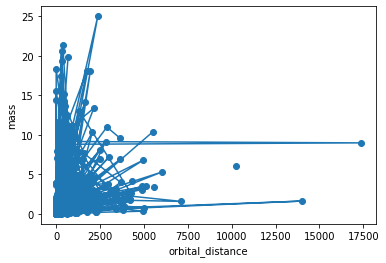

In [49]:
plt.plot(df.orbital_period, df.mass,marker='o')
plt.xlabel("orbital_distance")
plt.ylabel("mass")
plt.show()

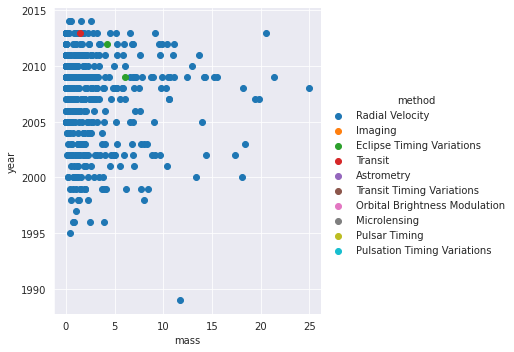

In [51]:
sns.set_style("darkgrid")
sns.FacetGrid(df, hue="method", size=5).map(plt.scatter, "mass", "year").add_legend()
plt.show()

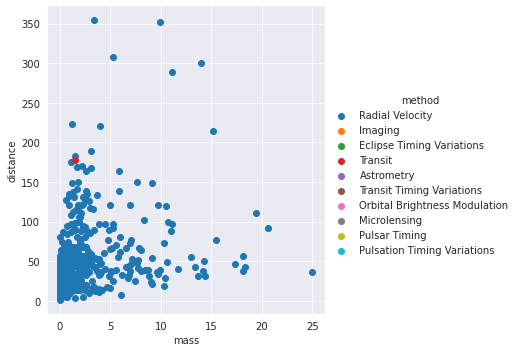

In [52]:
sns.set_style("darkgrid")
sns.FacetGrid(df, hue="method", size=5).map(plt.scatter, "mass", "distance").add_legend()
plt.show()

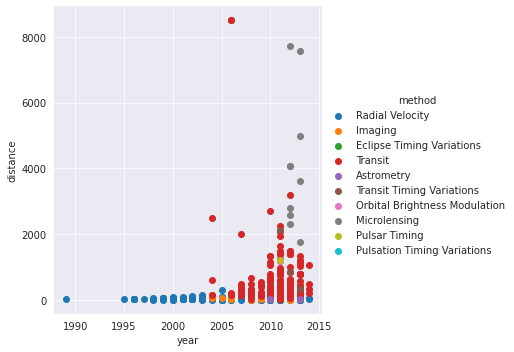

In [53]:
sns.set_style("darkgrid")
sns.FacetGrid(df, hue="method", size=5).map(plt.scatter, "year", "distance").add_legend()
plt.show()

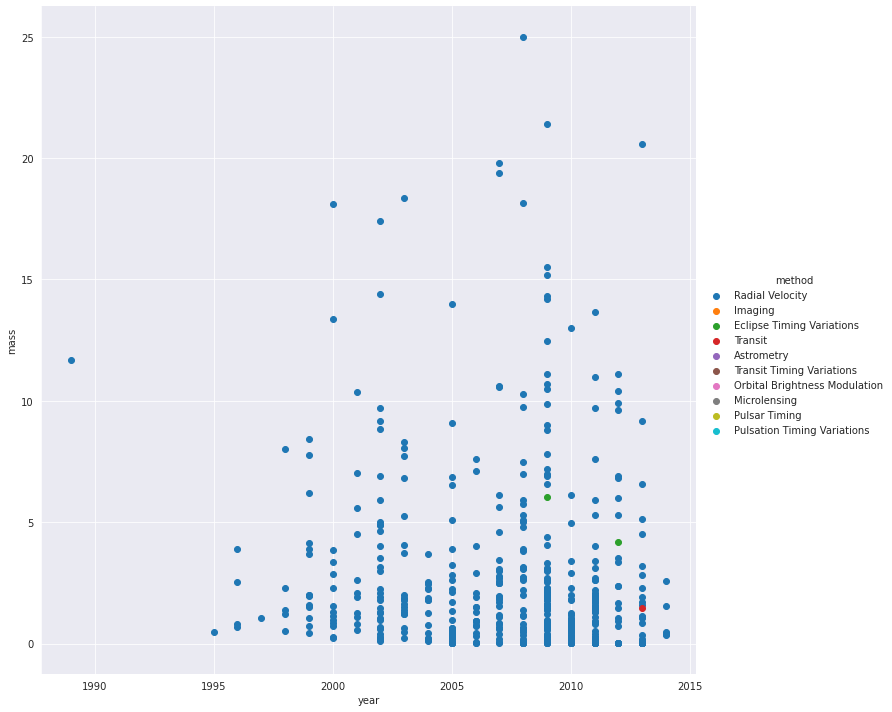

In [55]:
sns.set_style("darkgrid")
sns.FacetGrid(df, hue="method", size=10).map(plt.scatter, "year", "mass",).add_legend()
plt.show()

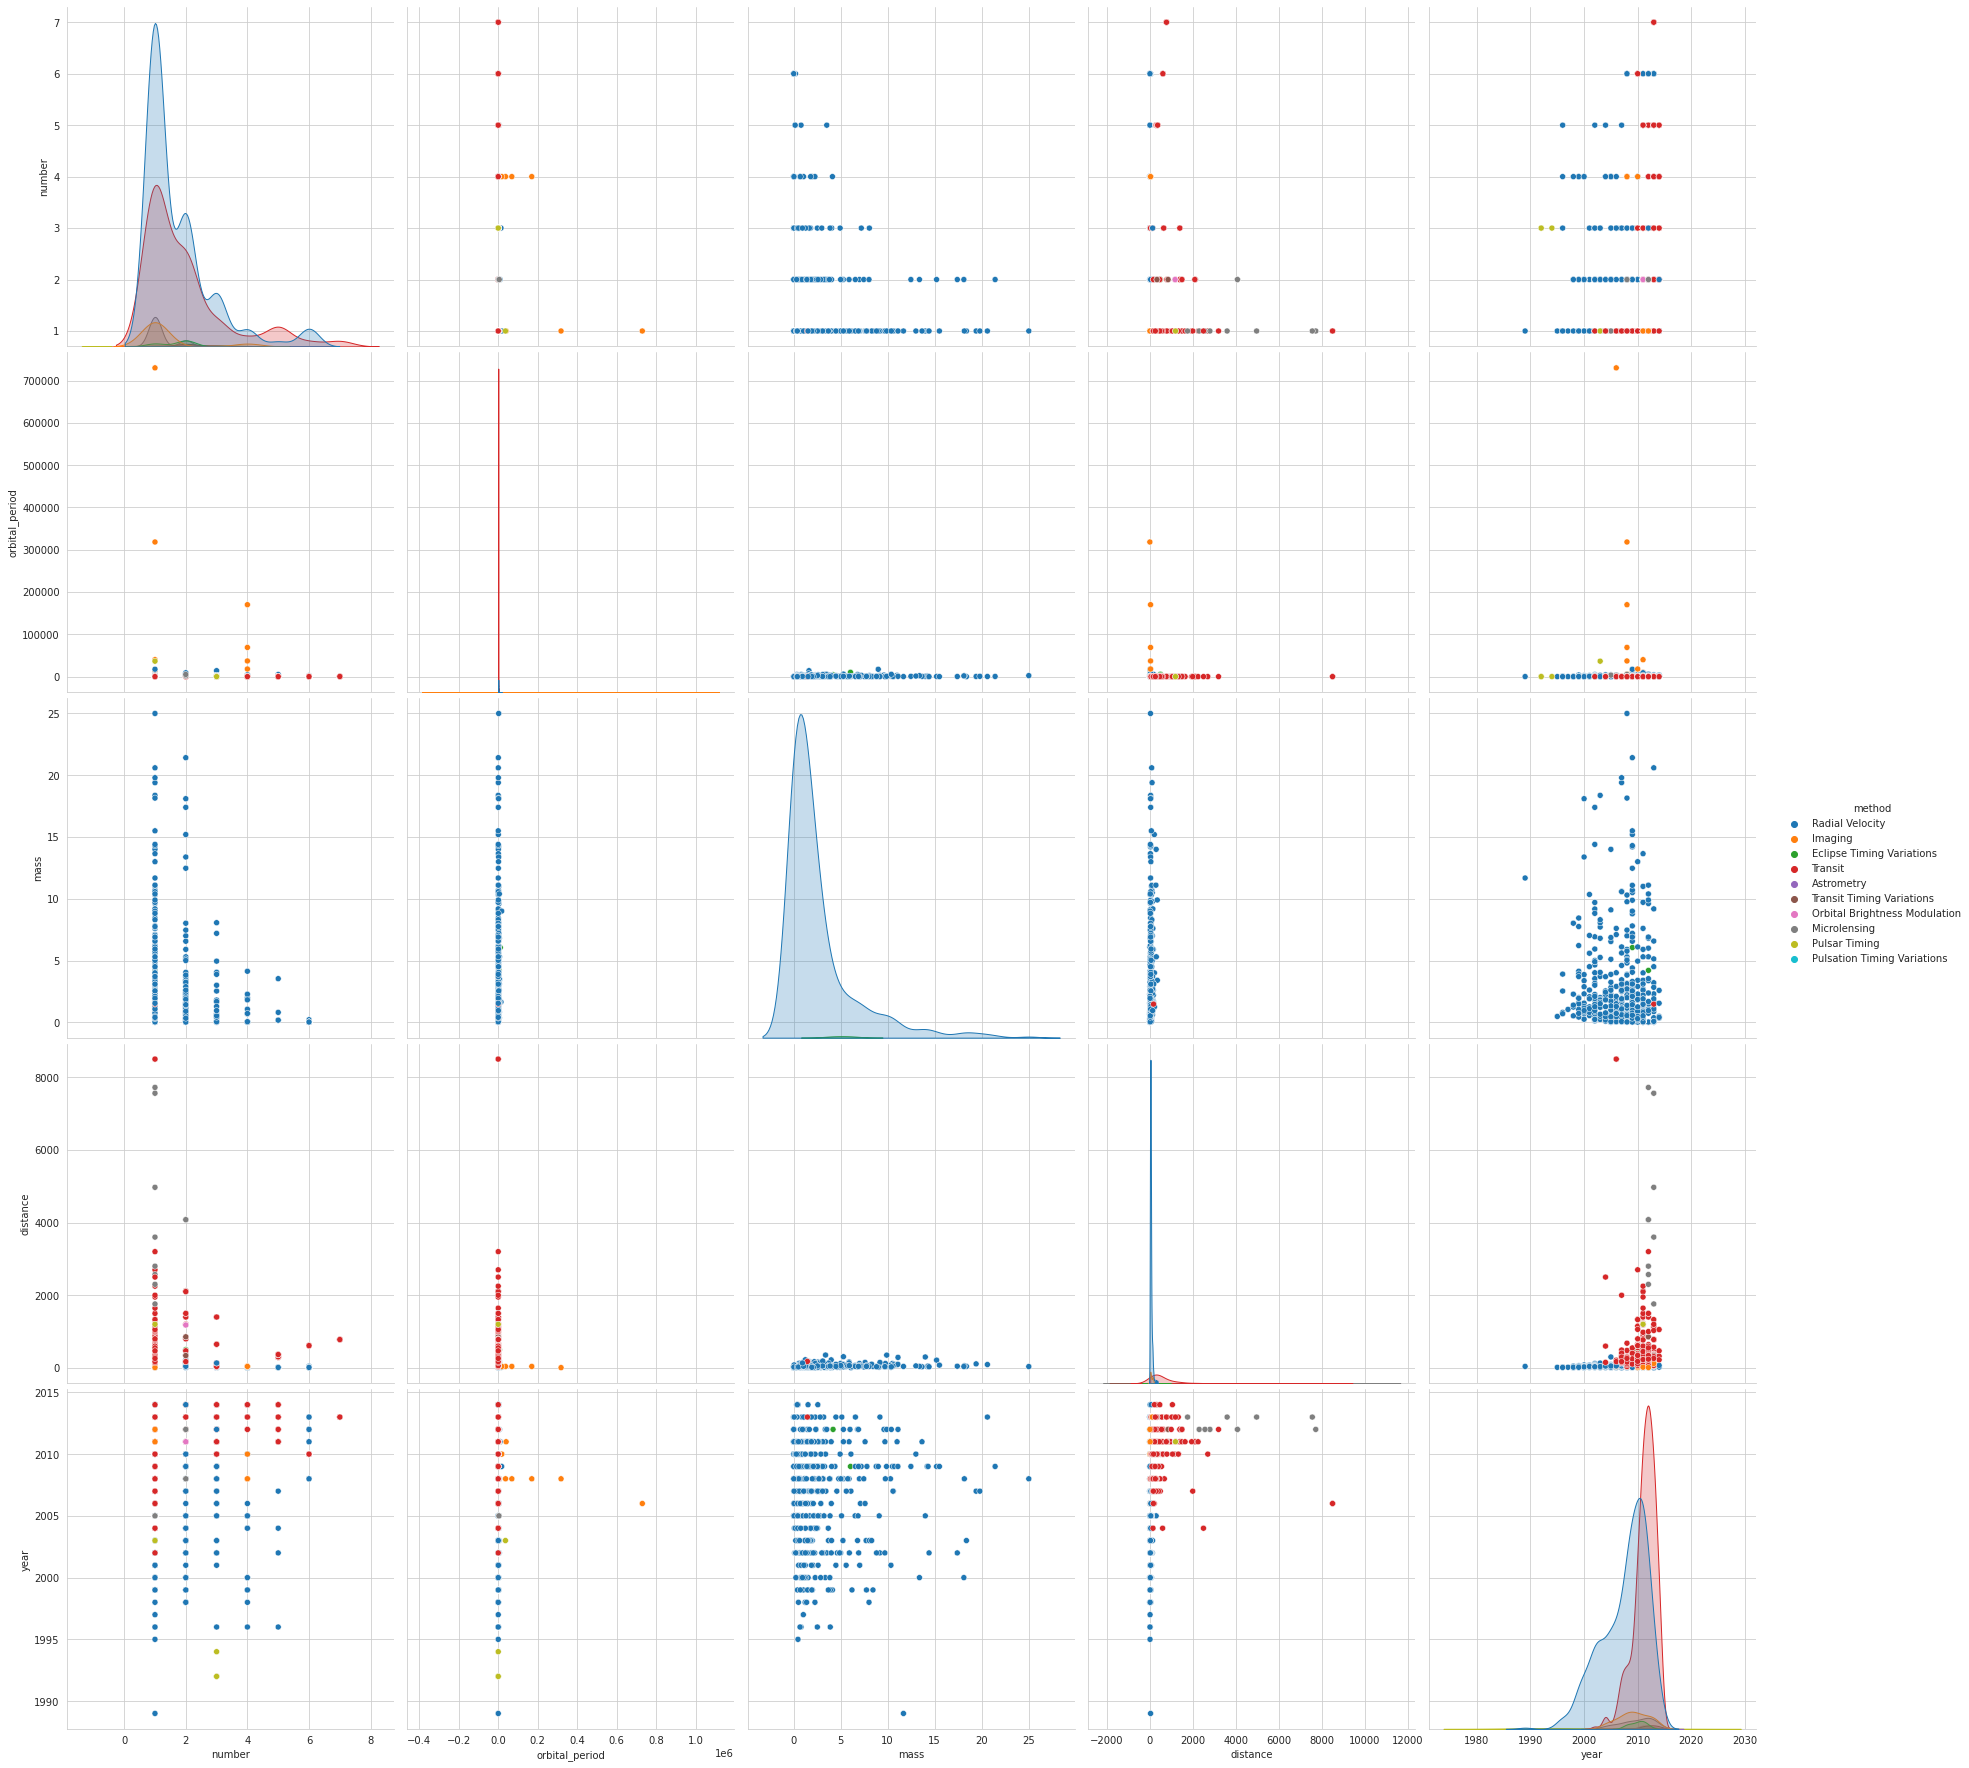

In [58]:
plt.close()
sns.set_style("whitegrid");
sns.pairplot(df, hue="method", size=5, diag_kind="kde")
plt.show()

In [59]:
df["method"].value_counts()

Radial Velocity                  553
Transit                          397
Imaging                           38
Microlensing                      23
Eclipse Timing Variations          9
Pulsar Timing                      5
Transit Timing Variations          4
Orbital Brightness Modulation      3
Astrometry                         2
Pulsation Timing Variations        1
Name: method, dtype: int64

In [61]:
planet_radial=df.loc[df["method"]=="Radial Velocity"];
planet_transit=df.loc[df["method"]=="Transit"];
planet_iamging=df.loc[df["method"]=="Imaging"];
planet_etv=df.loc[df["method"]=="Eclipse Timing Variations"];
planet_pulsar=df.loc[df["method"]=="Pulsar Timing"];
planet_tratimev=df.loc[df["method"]=="Transit Timing Variations"];
planet_orbibriht=df.loc[df["method"]=="Orbital Brightness Modulation"];
planet_Astrometry=df.loc[df["method"]=="Astrometry"];



[0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
[14.98  15.559 16.138 16.717 17.296 17.875 18.454 19.033 19.612 20.191
 20.77 ]


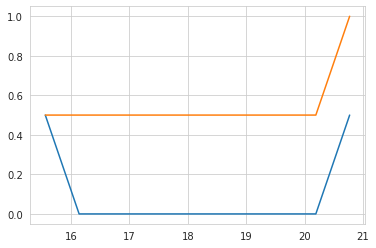

In [63]:
counts, bin_edges=np.histogram(planet_Astrometry['distance'], bins=10, density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

[0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
[14.98  15.559 16.138 16.717 17.296 17.875 18.454 19.033 19.612 20.191
 20.77 ]


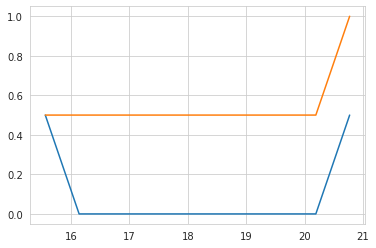

In [66]:
counts, bin_edges=np.histogram(planet_Astrometry['distance'], bins=10, density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

[0.5 0.  0.  0.  0.  0.  0.  0.  0.  0.5]
[2010.  2010.3 2010.6 2010.9 2011.2 2011.5 2011.8 2012.1 2012.4 2012.7
 2013. ]


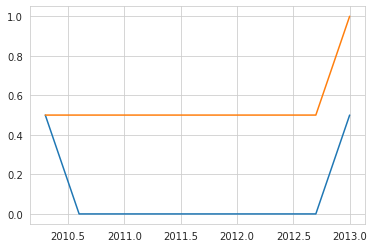

In [67]:
counts, bin_edges=np.histogram(planet_Astrometry['year'], bins=10, density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

In [68]:
df.columns

Index(['method', 'number', 'orbital_period', 'mass', 'distance', 'year'], dtype='object')

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5]


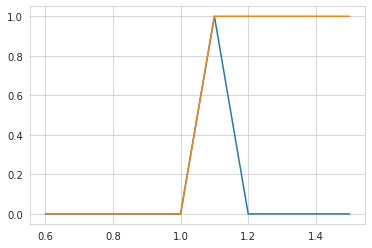

In [69]:
counts, bin_edges=np.histogram(planet_Astrometry['number'], bins=10, density=True)
pdf=counts/sum(counts)
print(pdf)
print(bin_edges)
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)

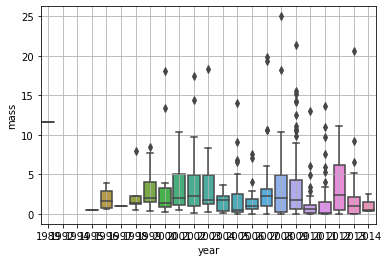

In [5]:
sns.boxplot(x='year', y='mass', data=df)
plt.grid()
plt.show()

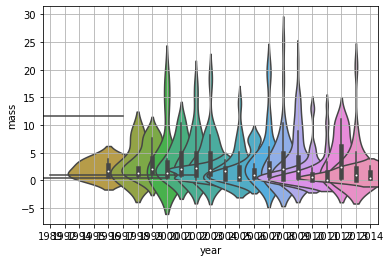

In [10]:
sns.violinplot(x='year', y='mass', data=df, width=10, gridsize=1000)
plt.grid()
plt.show()

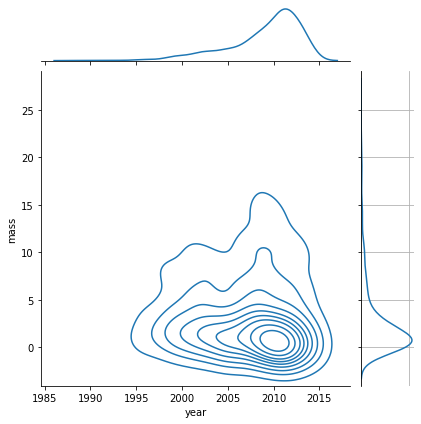

In [12]:
sns.jointplot(x='year', y='mass', data=df, kind="kde")
plt.grid()
plt.show()